# Previsão de Preços de Casas com Redes Neurais
## Aula 02 - Introdução a Deep Learning

Nesta aula, vamos usar **Redes Neurais Artificiais** para prever o preço de casas. Redes neurais são modelos mais sofisticados que podem capturar relações não-lineares complexas nos dados.

### 🎯 Objetivos:
1. Carregar e preparar dados no padrão brasileiro
2. Construir uma rede neural simples com TensorFlow/Keras
3. Treinar o modelo e visualizar o aprendizado
4. Avaliar e comparar com a regressão linear
5. Fazer previsões com o modelo neural

### 🧠 O que é uma Rede Neural?
Uma rede neural é inspirada no cérebro humano e consiste em camadas de "neurônios" conectados que aprendem padrões complexos nos dados através de ajustes iterativos.

Vamos começar! 🚀

## 1. Importação das Bibliotecas

In [38]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# TensorFlow e Keras para Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Scikit-learn para pré-processamento e métricas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Configurações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Bibliotecas importadas com sucesso!")
print(f"🔥 TensorFlow versão: {tf.__version__}")

✅ Bibliotecas importadas com sucesso!
🔥 TensorFlow versão: 2.20.0


## 2. Carregamento e Preparação dos Dados

In [39]:
# Carregando o dataset
df = pd.read_csv('Housing_BR.csv', index_col=0)  # index_col=0 remove a coluna Unnamed: 0

print("📊 Dataset carregado!")
print(f"   • Linhas: {df.shape[0]}")
print(f"   • Colunas: {df.shape[1]}")

# Visualizando primeiras linhas
df.head()

📊 Dataset carregado!
   • Linhas: 545
   • Colunas: 13


,preco,area_m2,quartos,banheiros,andares,rua_principal,quarto_hospedes,porao,aquecimento_agua,ar_condicionado,vagas_garagem,area_preferencial,mobilia
0,2.418182e+06,689.34,4,2,3,1,0,0,0,1,2,1,2
1,2.227273e+06,832.41,4,4,4,1,0,0,0,1,3,0,2
2,2.227273e+06,925.31,3,2,2,1,0,1,0,0,2,1,1
3,2.220909e+06,696.77,4,2,2,1,0,1,0,1,3,1,2
4,2.074545e+06,689.34,4,1,2,1,1,1,0,1,2,0,2


In [40]:
# Separando features (X) e target (y)
X = df.drop('preco', axis=1)
y = df['preco']

# Dividindo em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("📊 Dados divididos:")
print(f"   • Treino: {X_train.shape[0]} amostras")
print(f"   • Teste:  {X_test.shape[0]} amostras")
print(f"   • Features: {X_train.shape[1]}")

📊 Dados divididos:
   • Treino: 436 amostras
   • Teste:  109 amostras
   • Features: 12


## 3. Normalização dos Dados

⚠️ **Importante**: Redes neurais funcionam melhor quando os dados estão na mesma escala (normalizados)!

In [41]:
# Normalizando as features (StandardScaler: média=0, desvio padrão=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("🔧 Dados normalizados!")
print(f"   • Antes: valores variavam de {X_train.min().min():.2f} a {X_train.max().max():.2f}")
print(f"   • Depois: valores normalizados (média ≈ 0, std ≈ 1)")
print(f"\n💡 Por que normalizar?")
print("   • Redes neurais aprendem melhor com dados na mesma escala")
print("   • Evita que features com valores grandes dominem o aprendizado")
print("   • Acelera a convergência do treinamento")

🔧 Dados normalizados!
   • Antes: valores variavam de 0.00 a 1505.03
   • Depois: valores normalizados (média ≈ 0, std ≈ 1)

💡 Por que normalizar?
   • Redes neurais aprendem melhor com dados na mesma escala
   • Evita que features com valores grandes dominem o aprendizado
   • Acelera a convergência do treinamento


## 4. Construindo a Rede Neural

Vamos criar uma rede neural simples com 3 camadas escondidas!

In [42]:
# Criando o modelo de Rede Neural
model = Sequential([
    # Camada de entrada + primeira camada oculta (64 neurônios)
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),  # Dropout para evitar overfitting
    
    # Segunda camada oculta (32 neurônios)
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    # Terceira camada oculta (16 neurônios)
    Dense(16, activation='relu'),
    
    # Camada de saída (1 neurônio para regressão)
    Dense(1)
])

# Compilando o modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error para regressão
    metrics=['mae']  # Mean Absolute Error
)

print("🧠 Rede Neural criada!")
print("\n📐 Arquitetura do modelo:")
model.summary()

🧠 Rede Neural criada!

📐 Arquitetura do modelo:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

### 🔍 Entendendo a Arquitetura:

- **Camada 1**: 64 neurônios com ativação ReLU (captura padrões complexos)
- **Dropout 20%**: "Desliga" aleatoriamente 20% dos neurônios para evitar overfitting
- **Camada 2**: 32 neurônios (reduz dimensionalidade)
- **Camada 3**: 16 neurônios (refinamento final)
- **Camada de Saída**: 1 neurônio (previsão do preço)

**Total**: ~3.000 parâmetros treináveis!

## 5. Treinamento do Modelo

Agora vamos treinar a rede neural! O modelo aprenderá ajustando os pesos para minimizar o erro.

In [43]:
# Early Stopping: para o treinamento se não houver melhora
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

# Treinando o modelo
print("🚀 Iniciando treinamento...")
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # 20% dos dados de treino para validação
    epochs=300,            # Máximo de 200 épocas
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print("\n✅ Treinamento concluído!")

🚀 Iniciando treinamento...
Epoch 1/300


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 837997232128.0000 - mae: 859531.7500 - val_loss: 819226869760.0000 - val_mae: 840708.9375
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 837997232128.0000 - mae: 859531.7500 - val_loss: 819226869760.0000 - val_mae: 840708.9375
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 837996707840.0000 - mae: 859531.3750 - val_loss: 819226476544.0000 - val_mae: 840708.6250
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 837996707840.0000 - mae: 859531.3750 - val_loss: 819226476544.0000 - val_mae: 840708.6250
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 837996380160.0000 - mae: 859531.1875 - val_loss: 819226279936.0000 - val_mae: 840708.5625
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 837996380160.0000 - mae: 859531.1875 - val_loss: 819226279936.0000 - val_mae: 840708.5625
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 837996118016.0000 - mae: 859531.1250 - val_loss: 81922595

## 6. Visualizando o Aprendizado

Vamos ver como o modelo aprendeu ao longo do treinamento!

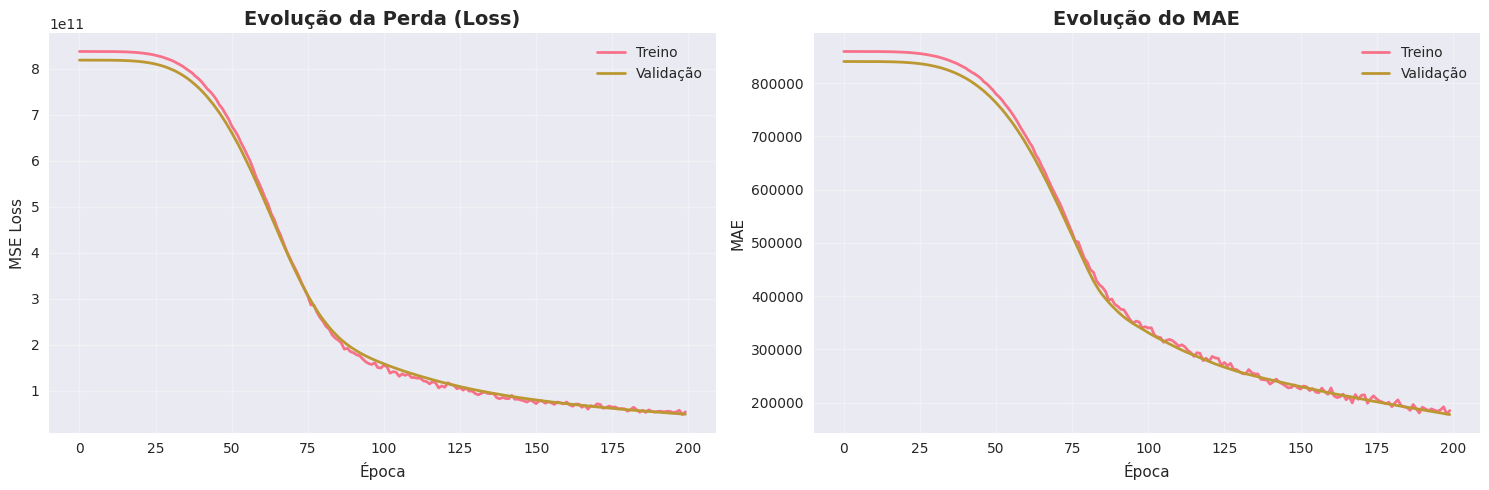

💡 Interpretação:
   • Curvas descendentes = modelo está aprendendo
   • Treino e validação próximos = boa generalização
   • Grande diferença = possível overfitting


In [15]:
# Visualizando a curva de aprendizado
plt.figure(figsize=(15, 5))

# Gráfico 1: Perda (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino', linewidth=2)
plt.plot(history.history['val_loss'], label='Validação', linewidth=2)
plt.title('Evolução da Perda (Loss)', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: MAE (Erro Médio Absoluto)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Treino', linewidth=2)
plt.plot(history.history['val_mae'], label='Validação', linewidth=2)
plt.title('Evolução do MAE', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Interpretação:")
print("   • Curvas descendentes = modelo está aprendendo")
print("   • Treino e validação próximos = boa generalização")
print("   • Grande diferença = possível overfitting")

## 7. Avaliação do Modelo

Vamos avaliar a performance da rede neural no conjunto de teste!

In [23]:
# Fazendo previsões
y_pred = model.predict(X_test_scaled).flatten()

# Calculando métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Função para formatar em reais
def formatar_reais(valor):
    return f"R$ {valor:,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.')

print("📊 MÉTRICAS DA REDE NEURAL")
print("=" * 60)
print(f"\n🎯 R² Score: {r2:.4f} ({r2*100:.2f}%)")
print("   → Explica quanto da variação dos preços o modelo captura")

print(f"\n📏 MAE (Erro Médio Absoluto): {mae}")
print("   → Erro médio nas previsões")

print(f"\n📐 RMSE: {rmse}")
print("   → Penaliza erros maiores")

print("\n" + "=" * 60)

if r2 > 0.75:
    print("✅ Excelente performance!")
elif r2 > 0.60:
    print("✅ Boa performance!")
else:
    print("⚠️  Performance moderada - pode ser melhorada")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


📊 MÉTRICAS DA REDE NEURAL

🎯 R² Score: 0.5875 (58.75%)
   → Explica quanto da variação dos preços o modelo captura

📏 MAE (Erro Médio Absoluto): 216258.39871116556
   → Erro médio nas previsões

📐 RMSE: 262532.59680131957
   → Penaliza erros maiores

⚠️  Performance moderada - pode ser melhorada


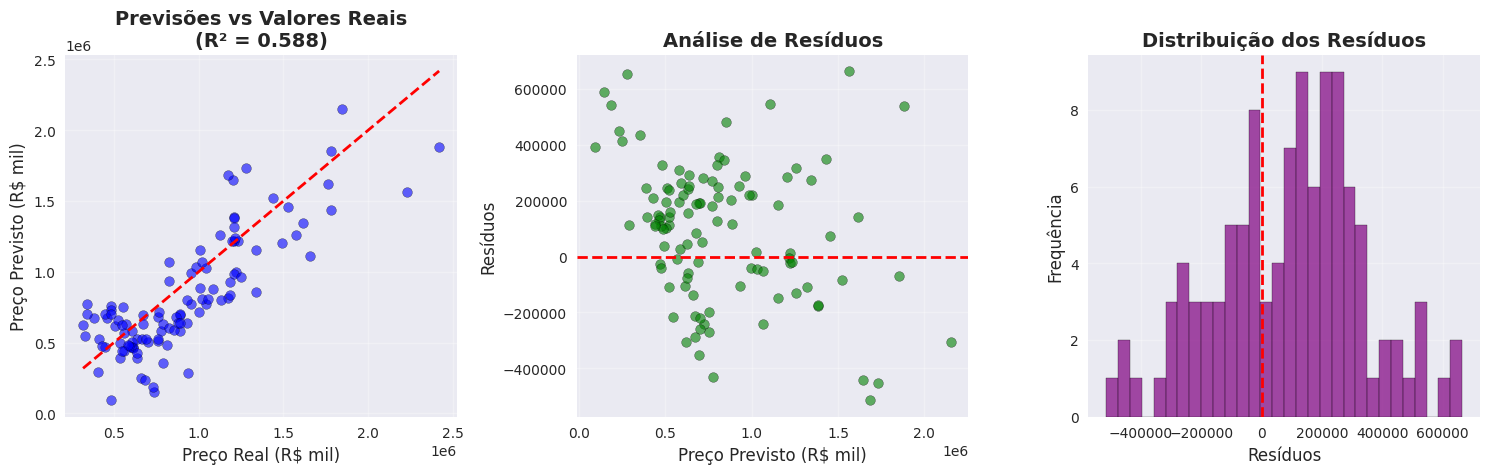

💡 Análise dos gráficos:
   • Pontos próximos à linha vermelha = boas previsões
   • Distribuição normal dos resíduos = bom ajuste
   • Resíduos próximos de 0 = modelo não enviesado


In [24]:
# Visualizando as previsões
plt.figure(figsize=(15, 5))

# Gráfico 1: Real vs Previsto
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Preço Real (R$ mil)', fontsize=12)
plt.ylabel('Preço Previsto (R$ mil)', fontsize=12)
plt.title(f'Previsões vs Valores Reais\n(R² = {r2:.3f})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Gráfico 2: Resíduos
plt.subplot(1, 3, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color='green', edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Preço Previsto (R$ mil)', fontsize=12)
plt.ylabel('Resíduos', fontsize=12)
plt.title('Análise de Resíduos', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Gráfico 3: Distribuição dos Resíduos
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Resíduos', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Resíduos', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Análise dos gráficos:")
print("   • Pontos próximos à linha vermelha = boas previsões")
print("   • Resíduos próximos de 0 = modelo não enviesado")
print("   • Distribuição normal dos resíduos = bom ajuste")

## 8. Simulador de Preços com Rede Neural

Teste o modelo fazendo suas próprias simulações!

In [37]:
# 🏠 SIMULADOR COM REDE NEURAL

print("="*70)
print("🧠 SIMULADOR DE PREÇOS - REDE NEURAL".center(70))
print("="*70)

# ============================================================
# 👇 ALTERE OS VALORES AQUI
# ============================================================

area_m2 = 465.15
quartos = 3
banheiros = 2
andares = 2
rua_principal = 1
quarto_hospedes = 1
porao = 0
aquecimento_agua = 0
ar_condicionado = 1
vagas_garagem = 2
area_preferencial = 1
mobilia = 1

# ============================================================
# 🎯 FAZENDO A PREVISÃO
# ============================================================

# Criando o vetor de features
features = np.array([[
    area_m2, quartos, banheiros, andares, rua_principal, quarto_hospedes,
    porao, aquecimento_agua, ar_condicionado, vagas_garagem,
    area_preferencial, mobilia
]])

# Normalizando as features (importante!)
features_scaled = scaler.transform(features)

# Fazendo a previsão
preco_previsto_mil = model.predict(features_scaled, verbose=0)[0][0]

# ============================================================
# 📊 RESULTADO
# ============================================================

print("\n" + "="*70)
print("📋 CARACTERÍSTICAS DA CASA".center(70))
print("="*70)

print(f"\n📐 Dimensões:")
print(f"   • Área: {area_m2:,.2f} m²".replace(',', 'X').replace('.', ',').replace('X', '.'))
print(f"   • Quartos: {quartos} | Banheiros: {banheiros} | Andares: {andares}")
print(f"   • Vagas: {vagas_garagem}")

print(f"\n🏡 Características:")
print(f"   • Rua principal: {'✅' if rua_principal else '❌'}")
print(f"   • Quarto hóspedes: {'✅' if quarto_hospedes else '❌'}")
print(f"   • Porão: {'✅' if porao else '❌'}")
print(f"   • Aquecimento: {'✅' if aquecimento_agua else '❌'}")
print(f"   • Ar condicionado: {'✅' if ar_condicionado else '❌'}")
print(f"   • Área preferencial: {'✅' if area_preferencial else '❌'}")
print(f"   • Mobília: {['🔲 Sem móveis', '📦 Semi-mob', '🛋️ Mobiliada'][mobilia]}")

preco_final = preco_previsto_mil * 1000
print("\n" + "="*70)
print(f"💰 PREÇO PREVISTO: {formatar_reais(preco_final)}".center(80))
print("="*70)

                 🧠 SIMULADOR DE PREÇOS - REDE NEURAL                  


ValueError: X has 12 features, but StandardScaler is expecting 13 features as input.

## 🎓 Conclusões e Aprendizados

### O que aprendemos nesta aula:

1. **🧠 Redes Neurais Artificiais**
   - Como construir uma rede neural simples
   - Arquitetura com múltiplas camadas ocultas
   - Dropout para evitar overfitting

2. **🔧 Pré-processamento para Deep Learning**
   - Importância da normalização dos dados
   - StandardScaler para padronizar features
   - Por que redes neurais precisam de dados normalizados

3. **📈 Treinamento e Otimização**
   - Early Stopping para evitar overtraining
   - Monitoramento da loss e métricas
   - Validação durante o treinamento

4. **📊 Avaliação e Visualização**
   - Curvas de aprendizado
   - Análise de resíduos
   - Comparação de performance

### 🔥 Vantagens das Redes Neurais:

- ✅ Capturam relações não-lineares complexas
- ✅ Aprendem automaticamente features importantes
- ✅ Escaláveis para datasets grandes
- ✅ Podem melhorar com mais dados

### ⚠️ Considerações:

- Precisam de mais dados que modelos simples
- Requerem normalização dos dados
- Treinamento pode ser mais demorado
- Menos interpretáveis que regressão linear

### 🚀 Próximos Passos:

- Experimentar com mais camadas ou neurônios
- Testar diferentes funções de ativação
- Ajustar hiperparâmetros (learning rate, batch size)
- Aplicar regularização (L1, L2)
- Comparar com outros modelos (Random Forest, XGBoost)